In [1]:
import geopandas as gpd
import urllib
import geopandas
import pylab as pl
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
import pysal as ps
import requests
import json
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import io
import shapely 
import matplotlib.pyplot as plt
from fiona.crs import from_epsg
import datetime
from geopandas.tools import sjoin
import pysal as ps
import scipy.stats
%matplotlib inline

#import mpl_toolkits 
#from mpl_toolkits.basemap import Basema

In [2]:
### The following are data will be used for this project 

# NYPD Motor Vehicle Collisions

In [3]:
#Reading the Data 
visionzero= pd.read_csv("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD")

visionzero.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/16/2018,0:10,MANHATTAN,10010,40.742275,-73.988914,"(40.742275, -73.988914)",5 AVENUE,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,11/16/2018,0:40,NaN,NaN,40.762720,-73.728170,"(40.76272, -73.72817)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Pavement Slippery,NaN,NaN,NaN,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN
2,11/16/2018,0:45,BROOKLYN,11211,40.710197,-73.958430,"(40.710197, -73.95843)",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4021791,Taxi,Taxi,NaN,NaN,NaN
3,11/16/2018,1:00,BRONX,10454,40.803555,-73.911840,"(40.803555, -73.91184)",EAST 137 STREET,WILLOW AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,11/16/2018,1:00,BROOKLYN,11221,40.694923,-73.915565,"(40.694923, -73.915565)",WILSON AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [4]:
visionzero.shape  

(1386002, 29)

In [5]:
visionzero[visionzero.DATE<'01-15-2014']

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


In [6]:
visionzero.TIME.dtype

dtype('O')

In [7]:
visionzero.head() 

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/16/2018,0:10,MANHATTAN,10010,40.742275,-73.988914,"(40.742275, -73.988914)",5 AVENUE,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,11/16/2018,0:40,NaN,NaN,40.762720,-73.728170,"(40.76272, -73.72817)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Pavement Slippery,NaN,NaN,NaN,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN
2,11/16/2018,0:45,BROOKLYN,11211,40.710197,-73.958430,"(40.710197, -73.95843)",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4021791,Taxi,Taxi,NaN,NaN,NaN
3,11/16/2018,1:00,BRONX,10454,40.803555,-73.911840,"(40.803555, -73.91184)",EAST 137 STREET,WILLOW AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,11/16/2018,1:00,BROOKLYN,11221,40.694923,-73.915565,"(40.694923, -73.915565)",WILSON AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [8]:
visionzero.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [9]:
visionzero.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [10]:
# Identifying the main factors for collison 
visionzero['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              622822
Driver Inattention/Distraction                           221446
Failure to Yield Right-of-Way                             70378
Following Too Closely                                     50336
Fatigued/Drowsy                                           48700
Backing Unsafely                                          46845
Other Vehicular                                           41102
Turning Improperly                                        33986
Passing or Lane Usage Improper                            23349
Lost Consciousness                                        20411
Traffic Control Disregarded                               19398
Unsafe Lane Changing                                      19338
Driver Inexperience                                       18523
Prescription Medication                                   15916
Pavement Slippery                                         13625
Alcohol Involvement                     

In [11]:
# List of vehicles in accidents in descending order of occurances

visionzero['VEHICLE TYPE CODE 1'].value_counts()

PASSENGER VEHICLE                      715228
SPORT UTILITY / STATION WAGON          313498
Sedan                                   56607
TAXI                                    50669
Station Wagon/Sport Utility Vehicle     43706
VAN                                     26540
OTHER                                   23972
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
MOTORCYCLE                               6536
Taxi                                     5894
BICYCLE                                  5567
Pick-up Truck                            3883
Box Truck                                2676
TK                                       2485
AMBULANCE                                2406
BU                                       2229
Bus                               

In [12]:
# Converting the date column to its specified data type
visionzero['DATE'] = pd.to_datetime(visionzero.DATE)

In [13]:
# Creating Three period 
visionzero['YEAR'] = visionzero.DATE.dt.year
visionzero['MONTH'] = visionzero.DATE.dt.month
visionzero['DAY'] = visionzero.DATE.dt.day


In [14]:
visionzero_df = visionzero.loc[:, ['DATE', 'YEAR', 'MONTH', 'DAY']].sort_values(by=['YEAR', 'MONTH', 
                                                            'DAY']).reset_index(drop=True)

visionzero_df.head()

,DATE,YEAR,MONTH,DAY
0,2012-07-01,2012,7,1
1,2012-07-01,2012,7,1
2,2012-07-01,2012,7,1
3,2012-07-01,2012,7,1
4,2012-07-01,2012,7,1


In [15]:
visionzero_df_agg = visionzero_df.groupby(['YEAR', 'MONTH', 'DAY'], as_index=False).agg(
    {"DATE": "count"})

visionzero_df_agg = visionzero_df_agg.rename(columns={'DATE': 'Number_of_Accidents'})


visionzero_df_agg.head()

,YEAR,MONTH,DAY,Number_of_Accidents
0,2012,7,1,538
1,2012,7,2,564
2,2012,7,3,664
3,2012,7,4,432
4,2012,7,5,591


In [16]:
visionzero_df_agg

,YEAR,MONTH,DAY,Number_of_Accidents
0,2012,7,1,538
1,2012,7,2,564
2,2012,7,3,664
3,2012,7,4,432
4,2012,7,5,591
5,2012,7,6,638
6,2012,7,7,490
7,2012,7,8,464
8,2012,7,9,533
9,2012,7,10,524


In [17]:
# visionzero['WEEKLY'] = visionzero.DATE.dt.weekofyear
# visionzero.head()

In [18]:
# visionzero.columns

In [19]:
# counts = visionzero.groupby(by=['YEAR','WEEKLY'])['UNIQUE KEY'].count().reset_index()

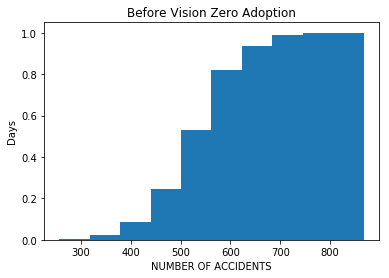

In [20]:
# Accidents before 2014
x = visionzero_df_agg[visionzero_df_agg.YEAR < 2014]['Number_of_Accidents']

plt.hist(x=x,cumulative=True,normed=True)
plt.xlabel("NUMBER OF ACCIDENTS")
plt.ylabel("Days")
plt.title("Before Vision Zero Adoption")

plt.show()

#### Figure 1. Before 2014 number of accidents prior to the adoption of vision zero 

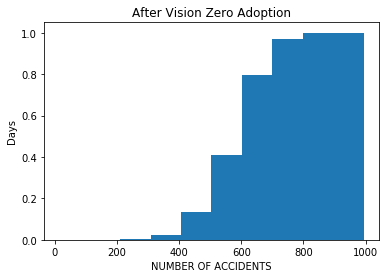

In [21]:
x_after = visionzero_df_agg[visionzero_df_agg.YEAR > 2014]['Number_of_Accidents']

plt.hist(x=x_after,cumulative=True,normed=True)
plt.xlabel("NUMBER OF ACCIDENTS")
plt.ylabel("Days")
plt.title("After Vision Zero Adoption")

plt.show()

#### Figure 2. After 2014 number of accidents prior to the adoption of vision zero

,YEAR,MONTH,DAY,Number_of_Accidents
0,2012,7,1,538
1,2012,7,2,564
2,2012,7,3,664
3,2012,7,4,432
4,2012,7,5,591
5,2012,7,6,638
6,2012,7,7,490
7,2012,7,8,464
8,2012,7,9,533
9,2012,7,10,524


In [25]:
len(np.arange(0, 5000, 200))

25

In [59]:
# visionzero_df_agg = visionzero_df.groupby(["visionzero_df_agg.YEAR > 2014"], as_index=False).agg(
#     {"DATE": "count"})

# visionzero_df_agg = visionzero_df.groupby(["visionzero_df_agg.YEAR < 2014"], as_index=False).agg(
#     {"DATE": "count"})
# print (np.abs(csD / csD.max()-csN / csN.max()))

# pl.plot(bins[:-1] + 10, before_2014 / before_2014.max(), label = "Day")
# pl.plot(bins[:-1] + 10, after_2014 / after_2014.max(), label = "Night")
# pl.plot(bins[:-1] + 10, np.sqrt(after_2014 / after_2014.max() - before_2014 / before_2014.max())**2, 'k-',
#         label = "difference")
# pl.xlabel("Tripduration")
# pl.ylabel("Normalized Cumulative Number")
# pl.legend()

In [29]:
perform_op = (visionzero_df_agg.YEAR*10000+visionzero_df_agg.MONTH*100+visionzero_df_agg.DAY).apply(str)

visionzero_df_agg['DATE'] = pd.to_datetime(perform_op,format='%Y%m%d')

visionzero_df_agg = visionzero_df_agg[['DATE', 'YEAR', 'MONTH', 'DAY', 'Number_of_Accidents']] 

visionzero_df_agg.head()

,DATE,YEAR,MONTH,DAY,Number_of_Accidents
0,2012-07-01,2012,7,1,538
1,2012-07-02,2012,7,2,564
2,2012-07-03,2012,7,3,664
3,2012-07-04,2012,7,4,432
4,2012-07-05,2012,7,5,591


In [30]:
ts_df =  visionzero_df_agg.set_index('DATE')

ts_df = ts_df[['Number_of_Accidents']]

ts_df

,Number_of_Accidents
DATE,
2012-07-01,538
2012-07-02,564
2012-07-03,664
2012-07-04,432
2012-07-05,591
2012-07-06,638
2012-07-07,490
2012-07-08,464
2012-07-09,533


In [31]:
ts_df

,Number_of_Accidents
DATE,
2012-07-01,538
2012-07-02,564
2012-07-03,664
2012-07-04,432
2012-07-05,591
2012-07-06,638
2012-07-07,490
2012-07-08,464
2012-07-09,533


In [38]:
ts_df['2014-01-15':]

,Number_of_Accidents
DATE,
2014-01-15,583
2014-01-16,521
2014-01-17,589
2014-01-18,448
2014-01-19,380
2014-01-20,360
2014-01-21,1161
2014-01-22,498
2014-01-23,612


In [33]:
np.sort(ts_df.Number_of_Accidents.values)

array([  14,  188,  257, ...,  964,  994, 1161])

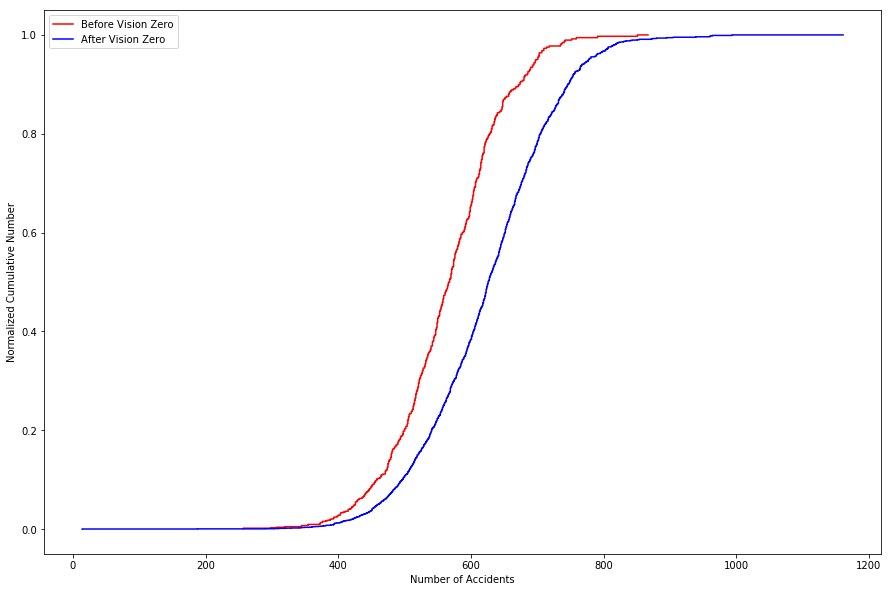

In [54]:
before_vision_zero = ts_df[:'2014-01-14'].copy()
after_vision_zero = ts_df['2014-01-15':].copy()
sorted_data_before = np.sort(before_vision_zero.Number_of_Accidents.values)  # Or data.sort(), if data can be modified
sorted_data_after = np.sort(after_vision_zero.Number_of_Accidents.values)

# Cumulative counts: np.arange(sorted_data_before.size)
#evaluate the cumulative
cumulative_before = np.cumsum(sorted_data_before)
cumulative_after = np.cumsum(sorted_data_after)

plt.figure(figsize=(15, 10))
plt.step(sorted_data_before, cumulative_before/cumulative_before.max(), 'r', label='Before Vision Zero')  # From 0 to the number of data points-1
plt.step(sorted_data_after, cumulative_after/cumulative_after.max(), 'b', label='After Vision Zero')  # From the number of data points-1 to 0
plt.xlabel("Number of Accidents")
plt.ylabel("Normalized Cumulative Number")
# plt.legend(loc="upper left")
pl.legend()

plt.show()

##### Figure 3. Indicates the differences between the before and after the adoption of vision zero 

In [ ]:
bins = np.arange(0, 5000, 200)

before_2014 = visionzero_df_agg[visionzero_df_agg.YEAR < 2014].copy()
after_2014 = visionzero_df_agg[visionzero_df_agg.YEAR > 2014].copy()

print (np.abs(after_2014 / after_2014.max()-before_2014 / before_2014.max()))

# pl.plot(bins[:-1] + 10, before_2014 / before_2014.max(), label = "Day")
# pl.plot(bins[:-1] + 10, after_2014 / after_2014.max(), label = "Night")
# pl.plot(bins[:-1] + 10, np.sqrt(after_2014 / after_2014.max() - before_2014 / before_2014.max())**2, 'k-',
#         label = "difference")
# pl.xlabel("Tripduration")
# pl.ylabel("Normalized Cumulative Number")
# pl.legend()

In [56]:
def changeFinder(data):

    n = len(data)
    datamean = data.mean()
    datasqmean = (data**2).mean()
    fac = datasqmean - datamean**2
    
    datacsum = data.cumsum()
    datasum = datacsum[-1]

    ppoc = np.zeros(n) #container for point of change relative prob

    #online (iterative) search for point of change
    for m in range(n-1):
        pos = m + 1
        relativePosition = (pos) * (n - pos)
 
        Q = datacsum[m] - (datasum - datacsum[m]) #cumsum up to m - cumsum after
        
        U = -(datamean * (n - 2 * pos) + Q)**2 / (4.0 * relativePosition) + fac
       
        ppoc[m+1] = (-(n * 0.5 - 1) * np.log(n * U * 0.5) - 
                 0.5 * np.log(relativePosition))

    ppoc[0] = min(ppoc[1:])
    changePoint = np.argmax(ppoc)
    
    return {'pChange': ppoc, 
            'pointOfChange': changePoint + 1,
            'meanBefore': (data[:changePoint+1]).mean(), 
            'meanAfter': (data[(changePoint+1):]).mean()}

In [57]:
pochange = changeFinder(ts_df.Number_of_Accidents.values)

pochange['pointOfChange']

1024

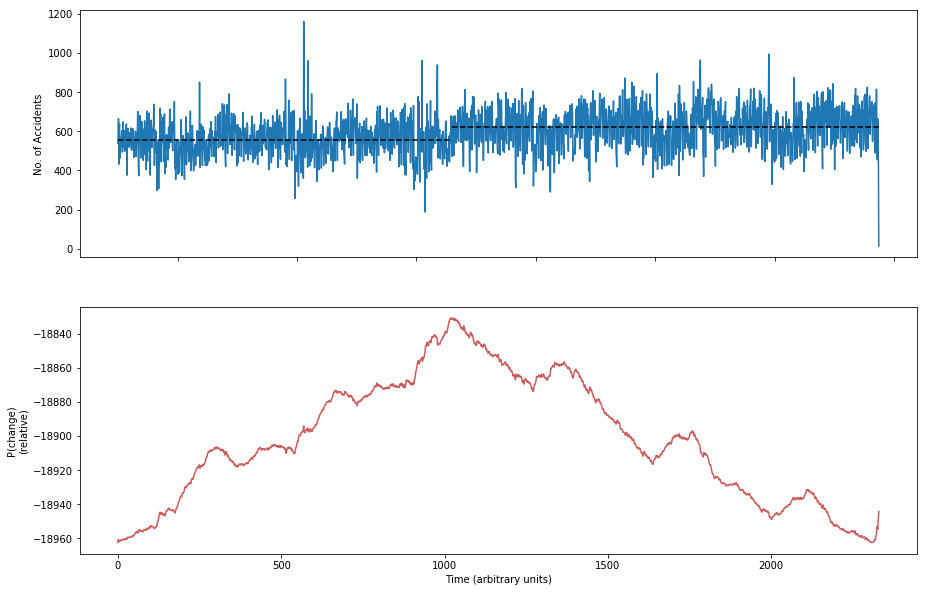

In [58]:
fig = pl.figure(figsize=(15,10))
ax1 = pl.subplot(211)
ax1.plot(ts_df.index.values, ts_df.Number_of_Accidents.values)
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("No. of Accidents")

ax2 = pl.subplot(212)
ax2.plot(range(len(ts_df)), 
        pochange['pChange'], color="IndianRed")
ax1.plot([ts_df.index.values.min(),ts_df.index.values[pochange['pointOfChange']]], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([ts_df.index.values[pochange['pointOfChange']],
          ts_df.index.values.max()], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax2.set_ylabel("P(change)\n(relative)")
ax2.set_xlabel("Time (arbitrary units)");

##### Plot 4. Reflects the time series of the effectiveness 

In [160]:
pochange['pChange'].argsort()[::-1][:10]

array([1023, 1020, 1031, 1024, 1018, 1019, 1032, 1030, 1026, 1027])

In [174]:
ts_df.iloc[1023]

Number_of_Accidents    630
Name: 2015-04-20 00:00:00, dtype: int64

In [133]:
pl.rcParams['font.size']= 18.0

In [53]:
from scipy.stats import kstest

before_vision_zero = ts_df[:'2014-01-14'].values.reshape(1, -1)[0]
after_vision_zero = ts_df['2014-01-15':].values.reshape(1, -1)[0]


ks = scipy.stats.ks_2samp(before_vision_zero, after_vision_zero)

print (ks)

Ks_2sampResult(statistic=0.28054896307979027, pvalue=5.712013011686036e-30)


Summary: KS-test tests whether 2 samples are drawn from the same distribution. It returns two floats: the first is KS statistic, the second is two-tailed p-value. In terms of the Null hypothesis, if the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same. Applying to the Vision Zero case, since the p-value is just pvalue=5.712013011686036e-30 which is far smaller than critical value 0.05, we reject the Null hypothesis that there is no statistical difference in the  for the before and after the adoption of Vision Zero.

The scipy.stats KS test already tells us the significance and the p-value.




